In [1]:
import os
import numpy as np
import math
import time
import seaborn as sns
import matplotlib.pyplot as plt

from dataclasses import dataclass
from typing import Any, List, Tuple, Dict

from core.ga import GA , read_problem
from core.pso import PSO

## Utilization

In [4]:
def is_dominated2(chrom1, chrom2):
    """
    Check if chrom1 is dominated by chrom2.
    """
    return (chrom2.personal_best_score.time <= chrom1.personal_best_score.time and chrom2.personal_best_score.profit >= chrom1.personal_best_score.profit) and \
           (chrom2.personal_best_score.time < chrom1.personal_best_score.time or chrom2.personal_best_score.profit > chrom1.personal_best_score.profit)

def find_dominance_flags2(population):
    """
    Assign a flag for each chromosome in the population.
    1 for non-dominated, 0 for dominated.
    """
    flags = [1] * len(population)  # Initialize all as non-dominated

    for i, chrom1 in enumerate(population):
        for chrom2 in population:
            if chrom1 != chrom2 and is_dominated2(chrom1, chrom2):
                flags[i] = 0  # Mark as dominated
                break  # No need to check further if dominated

    return flags

In [5]:
def plot_experiment_results2(data, pso, res):
    best_path , best_plan, best_score = res
    population = pso.particles
    flag = find_dominance_flags2(population)

    print(f"======MetaData======")
    print(f"name : {data.Name}")
    print(f"num dimension : {data.Dimension}")
    print(f"num item : {data.ITEMS}")
    print(f"max weight : {data.CAPACITY}")
    print(f"speed range: [{data.MIN_SPEED},{data.MAX_SPEED}]")
    print(f"renting ratio : {data.RENTING_RATIO}")
    print('======Genetic parameters======')
    print(f'max iteration: {pso.iterations}')
    print(f'max population: {pso.num_particles}')
    print(f"======experiment result======")
    # print(f"time executed: {ga.time_execute} seconds")
    print(f"best path : {best_path} | best plan : {best_plan}")
    print(f"time : {best_score.time} | profit : {best_score.profit}")
    print(f"Net profit : {best_score.net_profit}")
    
    sns.scatterplot(y=[x.personal_best_score.profit for x in population], x=[x.personal_best_score.time for x in population], hue=flag)
    plt.scatter(best_score.time, best_score.profit, color='red', label='best')
    plt.xlabel("time")
    plt.ylabel("profit")
    plt.title(f"Dataset: {data.Name}")
    plt.show()

### Experiment

In [2]:
ddir = './datasets'
path = [ os.path.join(ddir,p) for p in os.listdir(ddir) if not p.startswith('test')]
path

['./datasets\\a280-n1395.txt',
 './datasets\\a280-n279.txt',
 './datasets\\a280-n2790.txt',
 './datasets\\fnl4461-n22300.txt',
 './datasets\\fnl4461-n4460.txt',
 './datasets\\fnl4461-n44600.txt',
 './datasets\\pla33810-n169045.txt',
 './datasets\\pla33810-n33809.txt',
 './datasets\\pla33810-n338090.txt']

In [3]:
num_particles = 30
iterations = 100

=== datasets\a280-n1395
======MetaData======
name : a280-TTP
num dimension : 280
num item : 1395
max weight : 637010
speed range: [0.1,1.0]
renting ratio : 72.7
======Genetic parameters======
max iteration: 100
max population: 30
======experiment result======
best path : [122, 97, 141, 230, 203, 269, 110, 11, 257, 224, 36, 31, 240, 181, 184, 233, 225, 129, 244, 202, 208, 242, 162, 117, 44, 55, 163, 28, 166, 169, 260, 175, 243, 89, 130, 27, 4, 136, 248, 123, 164, 146, 255, 263, 132, 62, 118, 161, 73, 99, 116, 23, 115, 114, 59, 92, 226, 50, 54, 9, 172, 218, 57, 95, 103, 34, 217, 100, 168, 258, 41, 143, 84, 196, 251, 167, 80, 174, 213, 29, 7, 234, 232, 229, 271, 280, 25, 131, 153, 267, 37, 180, 156, 183, 58, 189, 188, 56, 82, 2, 113, 72, 26, 65, 35, 33, 261, 85, 273, 199, 266, 151, 144, 112, 66, 127, 109, 185, 215, 155, 52, 69, 106, 61, 150, 111, 91, 219, 140, 60, 253, 40, 105, 200, 88, 3, 186, 76, 179, 125, 19, 252, 157, 194, 212, 94, 135, 46, 93, 221, 193, 272, 70, 107, 249, 51, 77, 108

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

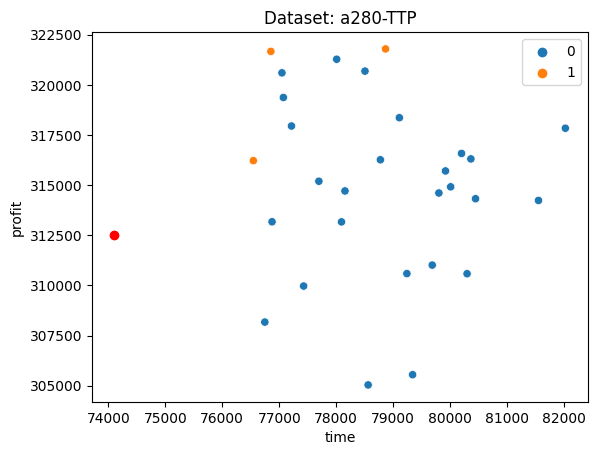

In [6]:
pdata0 = read_problem(path[0])
pso0 = PSO(pdata0,num_particles,iterations)
pres0 = pso0.run()
print(f"=== {path[0].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata0,pso0,pres0)

=== txt
======MetaData======
name : a280-TTP
num dimension : 280
num item : 279
max weight : 25936
speed range: [0.1,1.0]
renting ratio : 5.61
======Genetic parameters======
max iteration: 100
max population: 30
======experiment result======
best path : [4, 48, 223, 24, 263, 23, 155, 195, 95, 260, 86, 268, 239, 45, 175, 143, 183, 219, 11, 20, 101, 179, 177, 123, 187, 60, 252, 221, 174, 150, 90, 279, 99, 61, 3, 230, 116, 214, 190, 224, 232, 144, 104, 248, 212, 91, 147, 120, 237, 208, 246, 152, 156, 84, 25, 250, 154, 108, 265, 149, 266, 182, 13, 277, 96, 122, 35, 8, 274, 88, 171, 262, 67, 94, 160, 135, 109, 27, 251, 276, 119, 213, 58, 210, 124, 51, 134, 59, 111, 173, 83, 105, 236, 98, 75, 46, 243, 267, 87, 68, 55, 50, 168, 138, 275, 186, 125, 226, 47, 207, 159, 63, 205, 102, 71, 34, 196, 106, 128, 129, 227, 113, 211, 151, 26, 43, 253, 118, 261, 194, 114, 74, 164, 170, 234, 245, 229, 145, 77, 121, 2, 206, 278, 7, 165, 215, 255, 181, 62, 41, 39, 44, 161, 81, 103, 200, 37, 197, 158, 257, 19

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

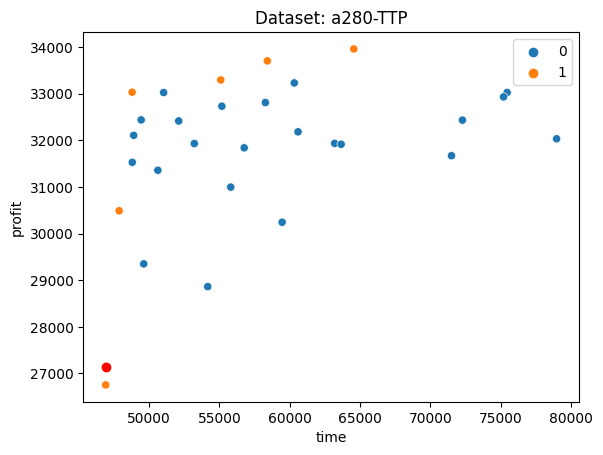

In [7]:
pdata1 = read_problem(path[1])
pso1 = PSO(pdata1,num_particles,iterations)
pres1 = pso1.run()
print(f"=== {path[1].split('/')[-1].split('.')[1]}")
plot_experiment_results2(pdata1,pso1,pres1)

=== datasets\a280-n2790
======MetaData======
name : a280-TTP
num dimension : 280
num item : 2790
max weight : 1262022
speed range: [0.1,1.0]
renting ratio : 208.53
======Genetic parameters======
max iteration: 100
max population: 30
======experiment result======
best path : [119, 277, 72, 171, 114, 255, 38, 76, 61, 55, 257, 194, 66, 156, 275, 65, 121, 123, 89, 113, 33, 73, 265, 16, 39, 17, 109, 87, 236, 173, 163, 83, 2, 193, 218, 199, 249, 237, 211, 215, 145, 233, 227, 247, 196, 201, 52, 56, 131, 242, 124, 149, 279, 208, 225, 151, 159, 209, 117, 162, 258, 234, 46, 170, 161, 169, 143, 100, 189, 79, 80, 91, 21, 120, 122, 155, 232, 160, 31, 198, 223, 77, 274, 133, 251, 134, 110, 272, 269, 19, 36, 192, 43, 107, 99, 95, 132, 50, 125, 34, 29, 182, 1, 137, 128, 184, 71, 203, 206, 8, 111, 256, 144, 135, 49, 35, 207, 230, 262, 28, 59, 54, 235, 250, 195, 266, 216, 259, 4, 37, 68, 261, 53, 157, 45, 271, 93, 148, 136, 105, 130, 253, 238, 74, 32, 248, 180, 214, 243, 22, 57, 190, 241, 10, 96, 224, 2

c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USER\anaconda3\envs\exeter\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

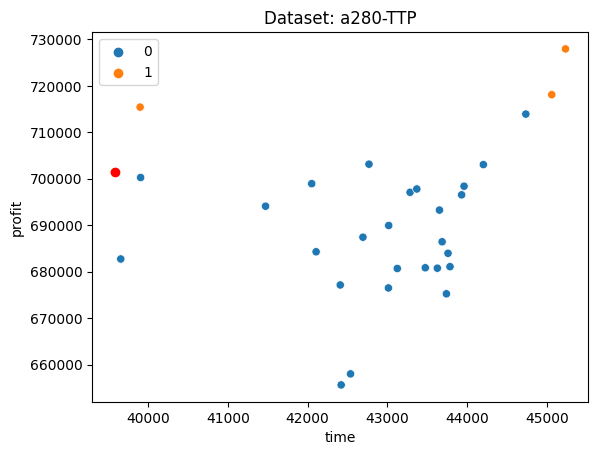

In [8]:
pdata2 = read_problem(path[2])
pso2 = PSO(pdata2,num_particles,iterations)
pres2 = pso2.run()
print(f"=== {path[2].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata2,pso2,pres2)

In [9]:
pdata3 = read_problem(path[3])
pso3 = PSO(pdata3,num_particles,iterations)
pres3 = pso3.run()
print(f"=== {path[3].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata3,pso3,pres3)

In [ ]:
pdata4 = read_problem(path[4])
pso4 = PSO(pdata4,num_particles,iterations)
pres4 = pso4.run()
print(f"=== {path[4].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata4,pso4,pres4)

In [ ]:
pdata5 = read_problem(path[5])
pso5 = PSO(pdata5,num_particles,iterations)
pres5 = pso5.run()
print(f"=== {path[5].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata5,pso5,pres5)

In [ ]:
pdata6 = read_problem(path[6])
pso6 = PSO(pdata6,num_particles,iterations)
pres6 = pso6.run()
print(f"=== {path[6].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata6,pso6,pres6)

In [ ]:
pdata7 = read_problem(path[7])
pso7 = PSO(pdata7,num_particles,iterations)
pres7 = pso7.run()
print(f"=== {path[7].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata7,pso7,pres7)

In [ ]:
pdata8 = read_problem(path[8])
pso8 = PSO(pdata8,num_particles,iterations)
pres8 = pso8.run()
print(f"=== {path[8].split('/')[-1].split('.')[0]}")
plot_experiment_results2(pdata8,pso8,pres8)